## Problem Statement

The New York City Controller's Office maintains a database of the salary and benefits paid to city employees since the fiscal year 2013. This is data representing the Employee Compensation report.

**Year Type:**		Fiscal (July through June) or Calendar (January through December)<br>

**Year:**		An accounting period of 12 months. The New York City operates operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.<br>

**Employee Identifier:**		Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset.<br> 

**Salaries:**		Normal salaries paid to permanent or temporary City employees. <br>

**Overtime:**		Amounts paid to City employees working in excess of 40 hours per week. <br>

**Other Salaries:**		Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. <br>

**Total Salary:**		The sum of all salaries paid to City employees.<br>

**Retirement:**		City contributions to employee retirement plans. <br>

**Health/Dental:**		City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. <br>

**Other Benefits:**		Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment insurance premiums, and minor discretionary benefits not included in the above categories.<br>

**Total Benefits:**		The sum of all benefits paid to City employees.<br>

**Total Compensation:**		The sum of all salaries and benefits paid to City employees.

# 1. Import Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import pickle
from sklearn.preprocessing import StandardScaler

# 2. Data Preparation

## 2.1 Understand the Data

In [2]:
# load the csv file
# store the data in 'df_compensation'
df_compensation = pd.read_csv('employee_compensation.csv')

# display first five observations using head()
df_compensation.tail()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
49995,Fiscal,2016,1629,100222.500000,17166.130000,600.000000,117988.630000,18763.050000,13068.800000,9406.860000,41238.710000,159227.340000
49996,Fiscal,2014,35471,1787.410000,0.000000,0.000000,1787.410000,0.000000,563.310000,145.360000,708.670000,2496.080000
49997,Fiscal,2016,42176,36552.830000,0.000000,0.000000,36552.830000,6802.480000,6855.830000,3071.630000,16729.940000,53282.770000
49998,Fiscal,2016,10980,46995.300000,0.000000,10943.140000,57938.440000,8840.980000,10624.640000,4706.370000,24171.990000,82110.430000
49999,Fiscal,2014,29083,69268.810000,0.000000,1648.090000,70916.900000,15119.460000,12464.610000,5853.520000,33437.590000,104354.490000


In [3]:
copy_df=df_compensation.copy()

In [4]:
# use 'shape' to check the dimension of data
df_compensation.shape

(50000, 12)

**Interpretation:** The data has 50000 observations and 12 variables.

In [5]:
# use 'info()' to understand the dataset
df_compensation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Year                 50000 non-null  int64  
 2   Employee_Identifier  50000 non-null  int64  
 3   Salaries             50000 non-null  float64
 4   Overtime             50000 non-null  float64
 5   Other_Salaries       50000 non-null  float64
 6   Total_Salary         50000 non-null  float64
 7   Retirement           50000 non-null  float64
 8   Health/Dental        50000 non-null  float64
 9   Other_Benefits       50000 non-null  float64
 10  Total_Benefits       50000 non-null  float64
 11  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


**Interpretation:** The variable `Year_Type` is categorical. All the other variables are numerical.

From the above output, we see that the data type of `Year` is 'int64'.

But according to the data definition, `Year` is categorical variable, which is wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

In [6]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'Year'
df_compensation['Year'] = df_compensation['Year'].astype(object)

## 2.3 Remove Insignificant Variables

The column `Employee_Identifier` contains the id of the employee, which is redundant for further analysis. Thus, we drop the column.

In [7]:
# drop the column 'Employee_Identifier' using drop()
# 'axis = 1' drops the specified column
df_compensation = df_compensation.drop('Employee_Identifier',axis=1)

## 2.2 Outlier Analysis and Treatment

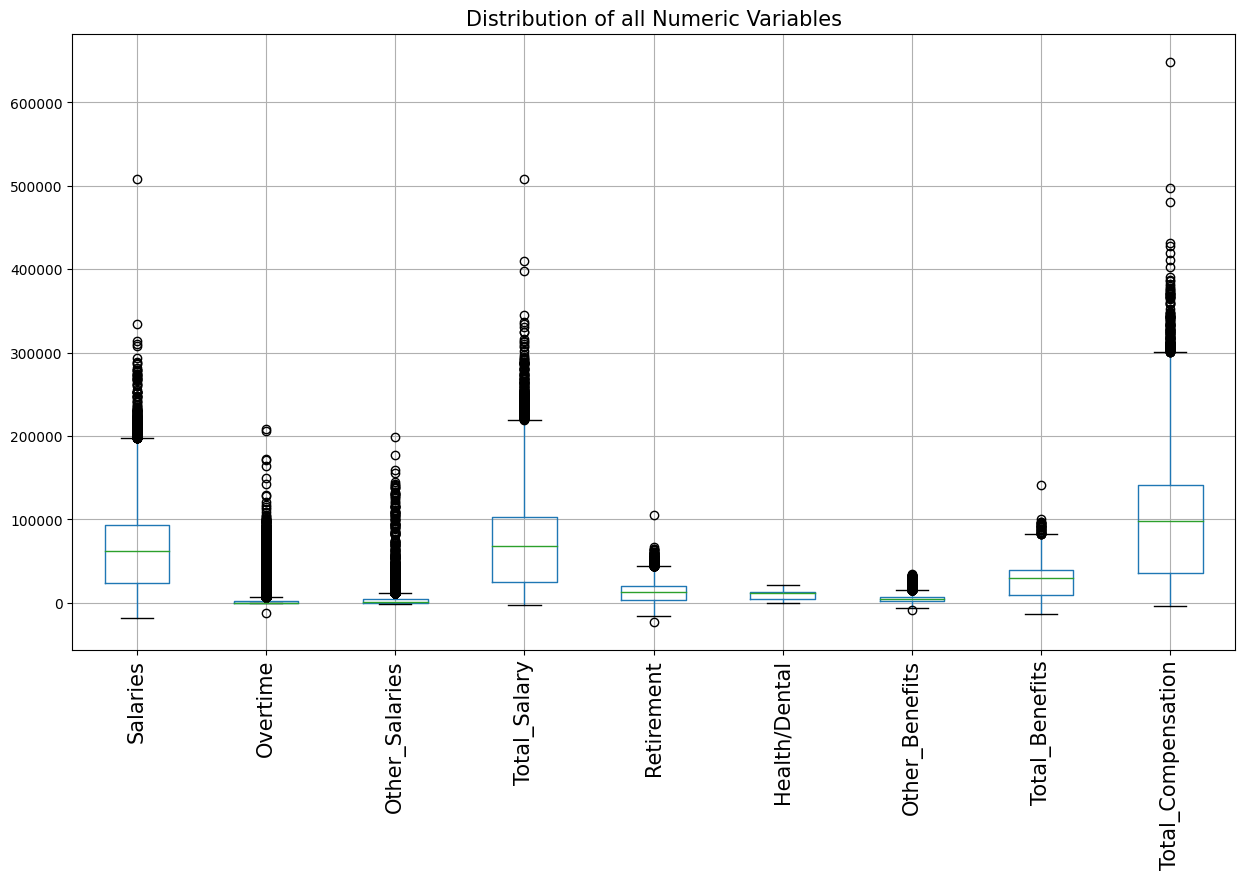

In [8]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_compensation.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variables 'Salaries', 'Total_Salary' and 'Total_Compensation' have a quite large range as compared to the other variables. Thus, it is difficult to see the outliers in such variables. So, we plot the boxplots of independent variables again by not considering the variables 'Salaries', 'Total_Salary' and 'Total_Compensation'. The variable Health/Dental has no outliers.**

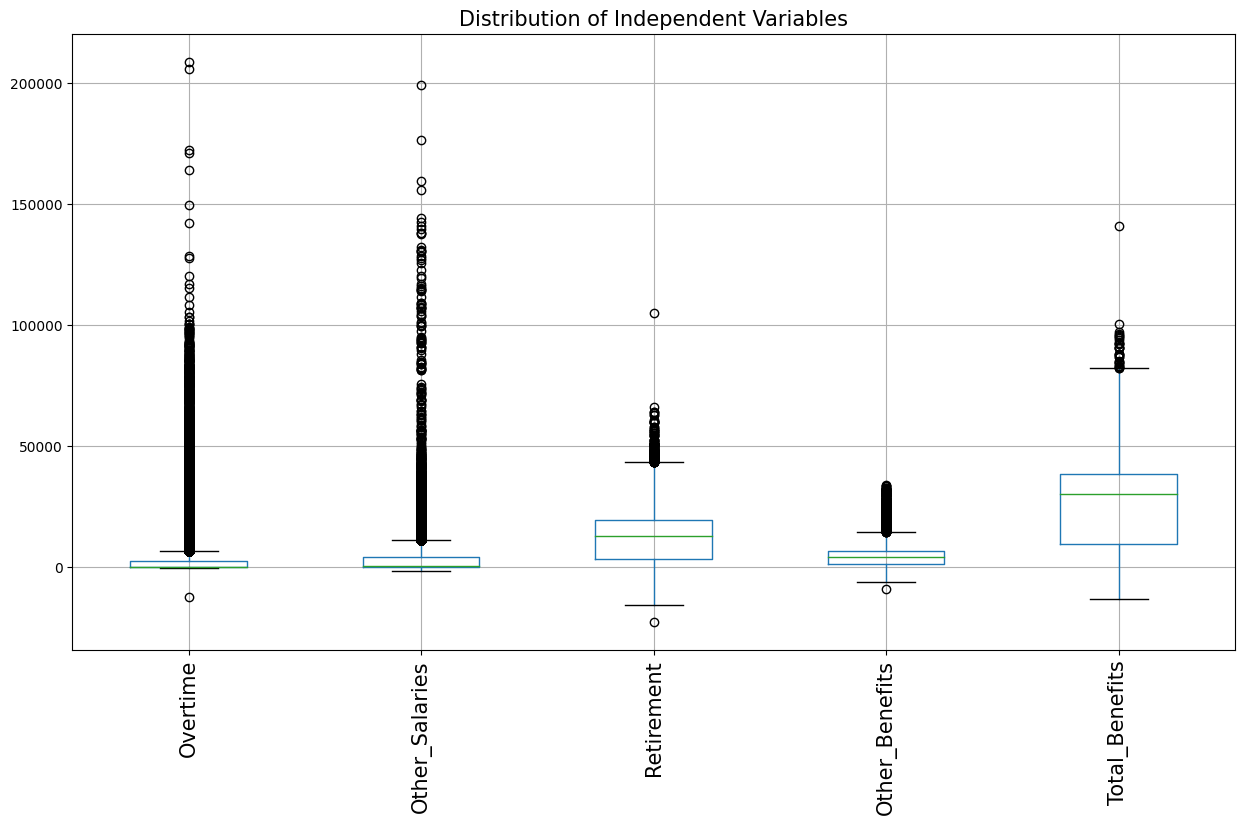

In [9]:
# boxplot of independent variables

# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplots of all the numeric variables except the variables 'Salaries', 'Total_Salary' and 'Total_Compensation' 
# use 'loc[]' to select the variables
df_compensation.loc[:,['Overtime', 'Other_Salaries', 'Retirement', 'Other_Benefits', 'Total_Benefits']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

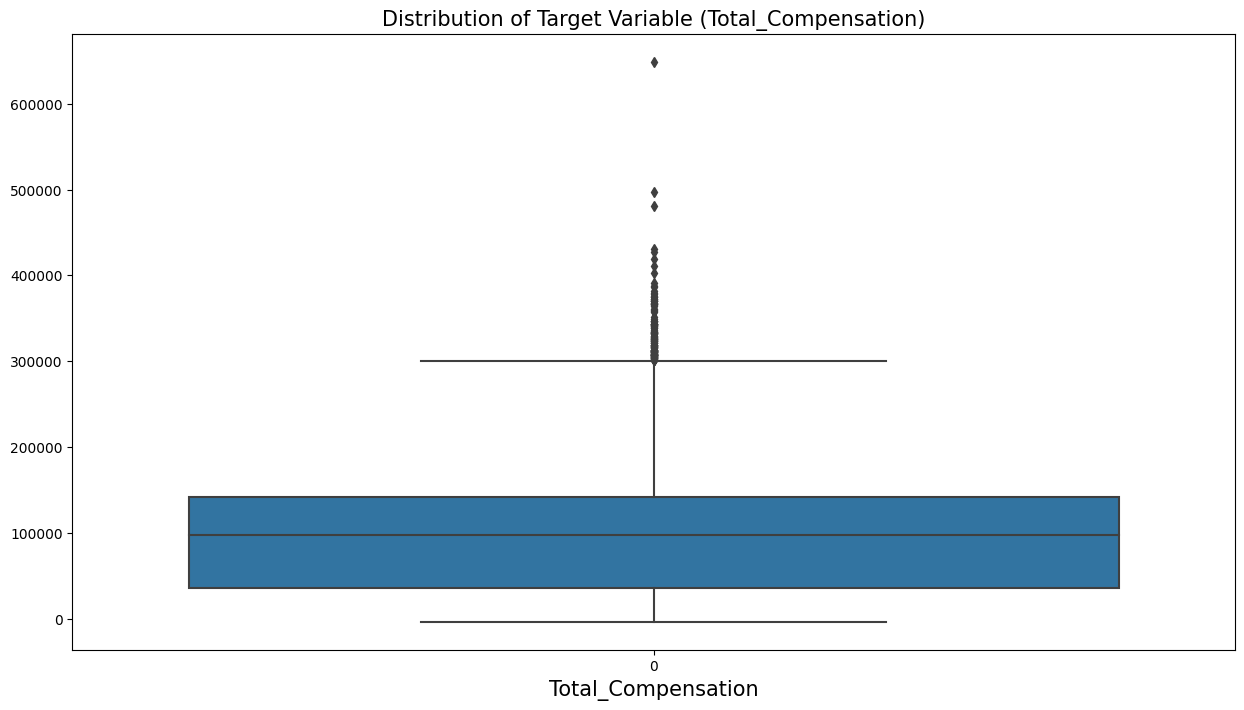

In [10]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplot for 'Total_Compensation' using seaborn library
sns.boxplot(df_compensation['Total_Compensation'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Total_Compensation)', fontsize = 15)
plt.xlabel('Total_Compensation', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

Let us use the IQR method to remove the outliers.

In [11]:
# calculate the first quartile
Q1 = df_compensation.quantile(0.25)

# calculate the third quartile
Q3 = df_compensation.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_compensation = df_compensation[~((df_compensation < (Q1 - 1.5 * IQR)) | (df_compensation > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)
# check the shape of the data
df_compensation.shape

(37721, 11)

**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

## 2.3 Missing Value Analysis and Treatment

**Check the presence of missing values in the data and treat them.**

In [12]:
df_compensation.shape

(37721, 11)

In [13]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_compensation.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_compensation.isnull().sum()*100/df_compensation.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Year_Type,0,0.000000
Year,0,0.000000
Salaries,0,0.000000
Overtime,0,0.000000
Other_Salaries,0,0.000000
Total_Salary,0,0.000000
Retirement,0,0.000000
Health/Dental,0,0.000000
Other_Benefits,0,0.000000
Total_Benefits,0,0.000000


**Interpretation:** There are no missing values in the data.

In [14]:
df_compensation.Year_Type.value_counts()

Fiscal      21732
Calendar    15989
Name: Year_Type, dtype: int64

In [15]:
df_compensation.Year.value_counts()

2015    10940
2014    10752
2013    10366
2016     5663
Name: Year, dtype: int64

## 2.4 Scale the Data

In [16]:
df_compensation.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.220000,267.450000,267.450000,92823.120000,20700.200000,12500.560000,7605.750000,40806.510000,133629.630000
1,Calendar,2015,1466.380000,348.230000,0.000000,1814.610000,0.000000,442.030000,141.590000,583.620000,2398.230000
2,Fiscal,2014,45659.880000,0.000000,1625.370000,47285.250000,10081.200000,0.000000,3936.630000,14017.830000,61303.080000
3,Fiscal,2013,41832.000000,0.000000,0.000000,41832.000000,7617.600000,5908.520000,3254.500000,16780.620000,58612.620000
4,Calendar,2013,74132.000000,0.000000,1443.420000,75575.420000,14851.230000,12888.340000,6233.850000,33973.420000,109548.840000


In [17]:
# scale the independent numeric variables
scaling = StandardScaler()
trasnform_data = scaling.fit_transform(df_compensation.iloc[:, 2:10])
df_compensation.iloc[:, 2:10] = pd.DataFrame(trasnform_data,columns=df_compensation.iloc[:, 2:10].columns)
# df_compensation.iloc[:, 2:10] = df_compensation.iloc[:, 2:10].apply(lambda rec: (rec - rec.mean()) / rec.std())
df_compensation.tail()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
37716,Calendar,2015,-1.025886,-0.428531,-0.559586,-1.048704,-1.180545,-0.950223,-1.022303,-1.148664,14760.570000
37717,Fiscal,2014,-1.244380,-0.428531,-0.587284,-1.263887,-1.180545,-1.467262,-1.258772,-1.357355,2496.080000
37718,Fiscal,2016,-0.388551,-0.428531,-0.587284,-0.427243,-0.405315,-0.210662,-0.315785,-0.351160,53282.770000
37719,Fiscal,2016,-0.131486,-0.428531,4.010054,0.087410,-0.173001,0.541960,0.211008,0.116228,82110.430000
37720,Fiscal,2014,0.416827,-0.428531,0.105097,0.399742,0.542512,0.909398,0.580676,0.698142,104354.490000


In [18]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = df_compensation.drop('Total_Compensation', axis = 1)

# create dataframe of target variable
df_target = df_compensation['Total_Compensation']

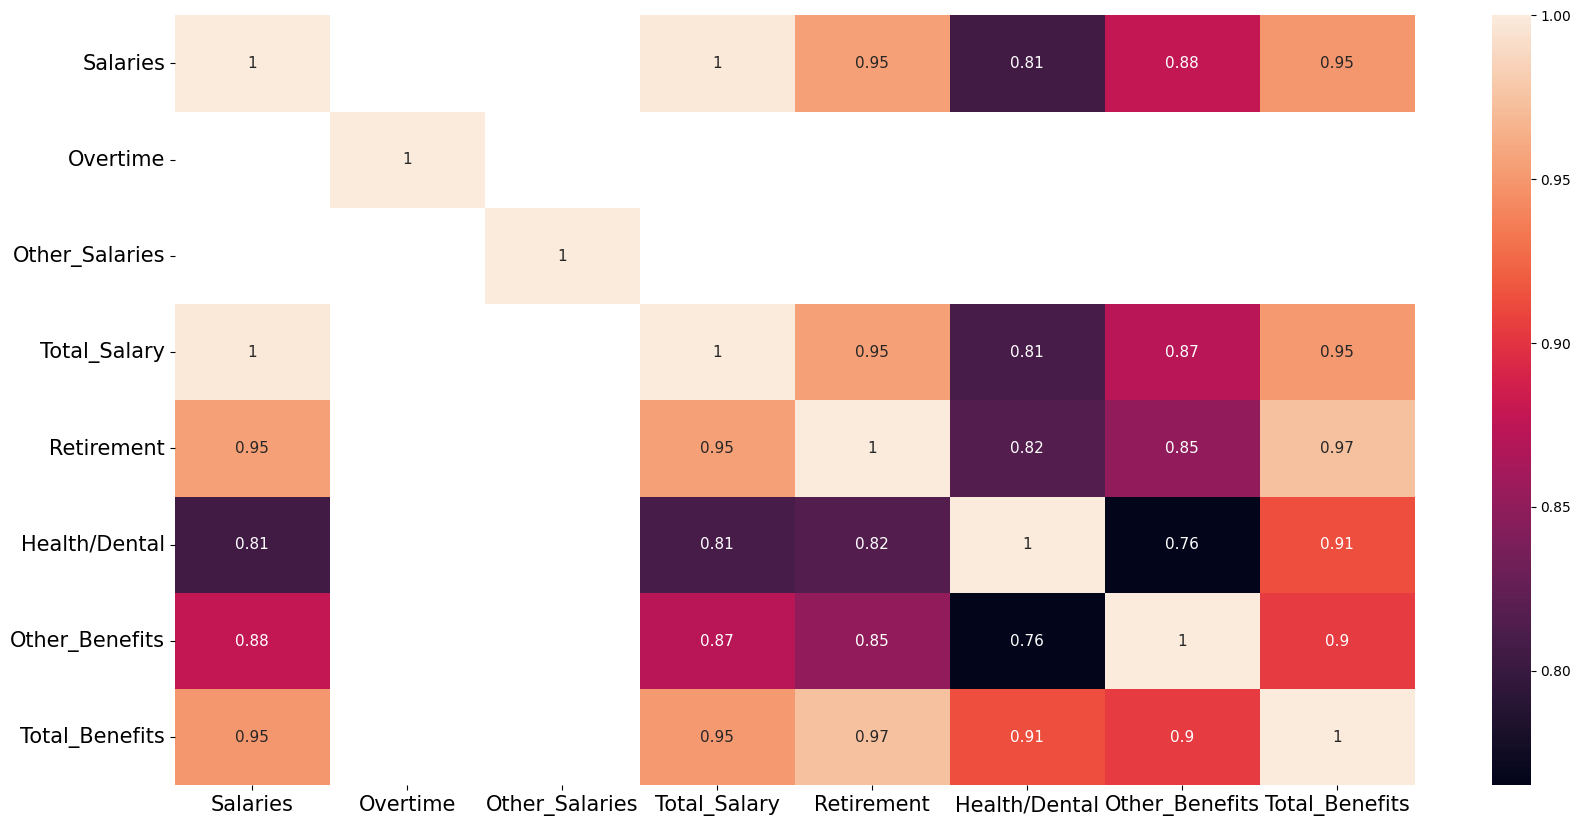

In [19]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [20]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement',
       'Health/Dental', 'Other_Benefits', 'Total_Benefits'],
      dtype='object')

In [21]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['Year_Type', 'Year'], dtype='object')

**Encode the categorical variable 'medincome' and create (n-1) dummy variables for n categories of 'medincome'.**

In [22]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
encoded_data = pd.get_dummies(data = df_cat)

In [23]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_compensation_dummy = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_compensation_dummy.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Year_Type_Calendar,Year_Type_Fiscal,Year_2013,Year_2014,Year_2015,Year_2016
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,0,1,0,0,1,0
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,1,0,0,0,1,0
2,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,0,1,0,1,0,0
3,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,0,1,1,0,0,0
4,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,1,0,1,0,0,0


In [24]:
df_compensation_dummy.shape

(37721, 14)

In [25]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_compensation_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
import statsmodels
import statsmodels.api as sm

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (26404, 14)
y_train_full (26404,)
X_test_full (11317, 14)
y_test_full (11317,)


In [26]:
# Start Coding From here

### Apply ML Model and describe how its behave on this data using Evaluation Matrics and Performance Matrics

In [27]:
compensation_model = OLS(y_train_full,X_train_full).fit()

# Evaluation Matrix

In [28]:
compensation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.295e+09
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:42:27   Log-Likelihood:            -1.5346e+05
No. Observations:               26404   AIC:                         3.069e+05
Df Residuals:                   26393   BIC:                         3.070e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Salaries            7691.0000   1.14e+14   6.72e-11      1.000   -2.24e+14    2.24e+14
Overtime             252.3125   3.76e+12   6.71e-11      1.000   -7.37e+12    7.37e+12
Other_Salaries       435.1875   6.71e+12   6.49e-11      1.000   -1.31e+13    1.31e+13
Total_Salary        3.376e+04   1.17e+14   2.88e-10      1.000    -2.3e+14     2.3e+14
Retirement          6754.2500   5.68e+12   1.19e-09      1.000   -1.11e+13    1.11e+13
Health/Dental       3854.0000   3.24e+12   1.19e-09      1.000   -6.36e+12    6.36e+12
Other_Benefits      2384.2500   2.01e+12   1.19e-09      1.000   -3.94e+12    3.94e+12
Total_Benefits      3681.5000   1.03e+13   3.57e-10      1.000   -2.02e+13    2.02e+13
Year_Type_Calendar  5.094e+04   1.28e+12   3.99e-08      1.000    -2.5e+12     2.5e+12
Year_Type_Fiscal    5.094e+04   1.28e+12   3.99e-08      1.000    -2.5e+12     2.5e+12
Year_2013           2.569e+04   1.28e+12   2.01e-08      1.000    -2.5e+12     2.5e+12
Year_2014           2.569e+04   1.28e+12   2.01e-08      1.000    -2.5e+12     2.5e+12
Year_2015           2.569e+04   1.28e+12   2.01e-08      1.000    -2.5e+12     2.5e+12
Year_2016           2.569e+04   1.28e+12   2.01e-08      1.000    -2.5e+12     2.5e+12
==============================================================================
Omnibus:                     1366.570   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1584.704
Skew:                          -0.598   Prob(JB):                         0.00
Kurtosis:                       2.890   Cond. No.                     1.22e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.92e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
# here you can see that an independen variable is fully correlted to the dependent variable 
# here you can see the Durbin-Watson there is no auto correlation present over the data 
# there is multi-colinearlity present in data set because a Cond.No is very high it is greter then 1000 it is sevear multi-corelation present. 

# Model Performance

In [30]:
# let's predect the value 
y_pred = compensation_model.predict(X_train_full)

In [31]:
print(y_pred)

5696     87430.367608
11959   158560.274889
4035     81767.295112
7193     45066.712683
2776      2990.014857
33132    83148.888846
23808    78574.140244
2069      4312.684563
19952    39363.610944
12862   122714.559955
35420    93478.089487
22317    57125.972430
7778    140988.288256
36377   120222.948052
11813    88450.310458
5310     59637.436882
20416   162669.459220
19957     6775.616041
36276    26905.272719
28357   201926.427165
11408    78511.579834
14821    91597.668493
27826     2850.775538
27140     2496.443568
9117      5627.235551
21403    96634.752519
15340     7544.834082
1797     12778.806650
33263    90887.609155
11716   134562.208363
3791     21098.450849
8401    183474.842095
1853      1481.647707
6592     94256.776265
27136    32205.245587
11310    83243.208883
22876     5515.458485
3938    151833.271142
30139    24793.964762
24781    47059.317815
9369    110552.063133
33444    30324.116670
21967    95300.133245
19456   101567.604026
17095   144602.275185
34519    8

In [32]:
# let's print MAE(Mean Absult Error)
mean_absolute_error(y_train_full,y_pred)

67.18623931860027

In [33]:
# here we can see MAE our model is performing well but there is multi-colinerity present.

In [34]:
# let's print MSE(Mean Squerd Error)
mean_squared_error(y_train_full,y_pred)

6540.56965714696

In [35]:
# here we can see MSE our model is performing well but there is multi-colinerity present.

In [36]:
# let's print MAE(Root Mean Absult Error)
np.sqrt(mean_absolute_error(y_train_full,y_pred))

8.19672125417232

In [37]:
# here we can see RMSE our model is performing well but there is multi-colinerity present.

# XGRegressor

In [38]:
model2 =  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.500000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0)
model2.fit(X_train_full,y_train_full)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.500000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [39]:
X_train_full.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Year_Type_Calendar,Year_Type_Fiscal,Year_2013,Year_2014,Year_2015,Year_2016
5696,0.016038,-0.428531,2.138382,0.124412,-0.016124,0.976732,0.290059,0.354821,0,1,1,0,0,0
11959,1.545880,-0.428531,-0.587284,1.463824,1.198276,1.030055,1.706827,1.316950,0,1,0,0,0,1
4035,0.079498,-0.428531,-0.587284,0.030314,0.103794,0.519746,0.114111,0.242896,1,0,0,0,1,0
7193,-0.598891,-0.428531,-0.421231,-0.623356,-0.377127,-0.118575,-0.552386,-0.352778,0,1,0,1,0,0
2776,-1.231076,-0.428531,-0.587284,-1.250882,-1.180545,-1.463450,-1.247493,-1.353958,1,0,0,0,1,0


In [43]:
ypread=model2.predict(X_test_full)

In [44]:
ypread

array([5.8293023e+04, 3.6682907e+01, 1.3674154e+03, ..., 2.5732037e+04,
       2.8853676e+04, 1.2251973e+05], dtype=float32)

In [45]:
mean_absolute_error(y_test_full,ypread)

374.8295993769201

In [46]:
mean_absolute_error(y_test_full,ypread)

374.8295993769201

In [47]:
model2.score(X_test_full,y_test_full)

0.9998425449185302

In [48]:
model2.score(X_train_full,y_train_full)

0.9999701993482525

In [49]:
# ML process with deployment code
pickle.dump(model2,open('ml_model.sav','wb')) # create a model into binary file
pickle.dump(scaling,open('scaler.sav','wb')) # create a scaler object into binary file

# Decision Tree Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
model3 = DecisionTreeRegressor()

In [52]:
model3.fit(X_train_full,y_train_full)

DecisionTreeRegressor()

In [53]:
model3.predict(X_test_full)

array([5.8244900e+04, 4.8260000e+01, 1.2455600e+03, ..., 2.5409070e+04,
       2.8738530e+04, 1.2241231e+05])

In [54]:
model3.score(X_train_full,y_train_full)

1.0

In [55]:
model3.score(X_test_full,y_test_full)

0.9997384434869788

In [56]:
DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.1,
    ccp_alpha=0.0)

DecisionTreeRegressor(min_impurity_decrease=0.1)

In [57]:
model3.score(X_train_full,y_train_full)

1.0

In [58]:
model3.score(X_test_full,y_test_full)

0.9997384434869788

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model4 = RandomForestRegressor()

In [61]:
model4.fit(X_train_full,y_train_full)

RandomForestRegressor()

In [62]:
model4.score(X_train_full,y_train_full)

0.9999855274873721